In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
model_df = pd.read_csv('data/model_df.csv')

In [7]:
X = model_df.drop('anm_tot_fh', axis=1)
y = model_df['anm_tot_fh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_neigbors = 3
regressor = KNeighborsRegressor(n_neighbors=n_neigbors)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

y_pred = regressor.predict(X_test)

print("Root Mean Squared Error: ", rmse)
print("R-squared (R2) Score: ", r2)

Root Mean Squared Error:  71.07231268289044
R-squared (R2) Score:  0.11844789939678857


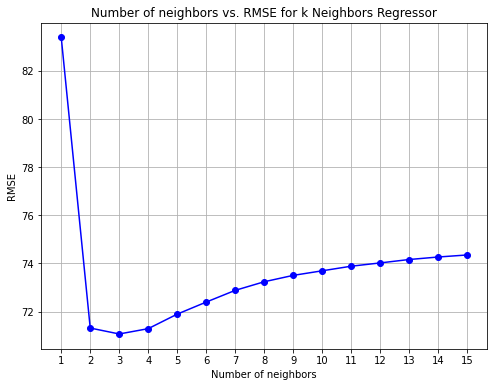

In [5]:
neighbors = range(1, 16)

rmse = []
r2 = []

for n in neighbors:
    regressor = KNeighborsRegressor(n_neighbors=n)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    accuracy = sqrt(mean_squared_error(y_test, predictions))
    rmse.append(accuracy)
    rs = r2_score(y_test, predictions)
    r2.append(rs)


plt.figure(figsize=(8, 6))
plt.plot(neighbors, rmse, marker='o', linestyle='-', color='b')
plt.title('Number of neighbors vs. RMSE for k Neighbors Regressor')
plt.xlabel('Number of neighbors')
plt.ylabel('RMSE')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

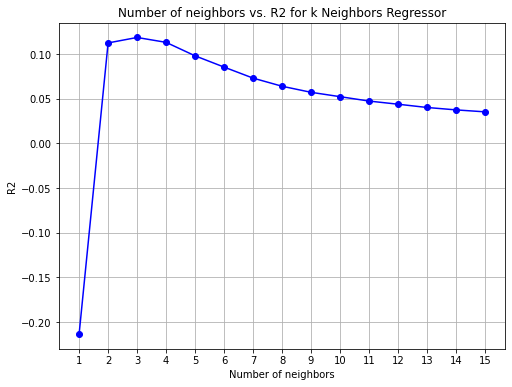

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(neighbors, r2, marker='o', linestyle='-', color='b')
plt.title('Number of neighbors vs. R2 for k Neighbors Regressor')
plt.xlabel('Number of neighbors')
plt.ylabel('R2')
plt.xticks(neighbors)
plt.grid(True)
plt.show()